<a href="https://colab.research.google.com/github/GeonKimdcu/DeepLearning/blob/main/Chapter05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 05 초기화와 정규화
---

## 5.1 가중치 초기화

신경망을 학습할 때 손실 함수에서 출발 위치를 결정하는 방법이 **모델 초기화**(initialization)이다. <br>
특히 가중치는 모델의 파라미터에서 가장 큰 비중을 차지하므로 가중치의 초기화 방법에 따라 학습 성능이 크게 달라질 수 있다.

### 5.1.1 상수 초기화

최적해에 관한 사전 정보가 없을 때 생각할 수 있는 가중치 초기화 방법 중 하나가 임의의 상수로 초기화하는 것이다.

#### 가중치를 0으로 초기화한다면?

신경망의 가중치를 모두 0으로 초기화했다고 해보자. <br>
뉴런의 가중치가 0이면 가중 합산 결과는 항상 0이 되고, 활성 함수는 가중 합산 결과인 0을 입력받아서 늘 같은 값을 출력한다.

$$z = w^tx+b=0\\a=activation(z)\in\{0,0.5\}$$

예를 들어 활성 함수가 ReLU나 하이퍼볼릭 탄젠트면 출력은 0이 되고, 시그모이드면 출력은 0.5가 된다. 또한 출력 뉴런의 활성 함수가 소프트맥스라면 모든 클래스의 확률이 동일한 균등 분포를 출력한다.

결과적으로 의미 없는 출력이 만들어지며 가중치가 0이면 학습도 진행되지 않는다.

다음 식과 같이 역전파 과정에서 뉴런의 지역 미분 $\frac{\partial z}{\partial x}$는 $w$이므로 항상 0이 되고, 다음 뉴런에 전달할 전역 미분 $\frac{\partial J}{\partial x}$도 0이 되기 때문에 학습이 진행되지 않는다.


$$\frac{\partial z}{\partial x}=w=0\\\frac{\partial J}{\partial x}=\frac{\partial J}{\partial z}\centerdot \frac{\partial z}{\partial x}=0$$

#### 가중치를 0이 아닌 상수로 초기화한다면?

이번에는 가중치를 0이 아닌 다른 상수로 초기화해보자. <br>
만약 가중치를 모두 0.1로 초기화한다면, 은닉 뉴런 $h_1 \dotsb h_n$은 입력 $(x_1,...,x_m)$과 가중치$(0.1,...,0.1)$로 같기 때문에 가중 합산 결과도 같고 활성 함수의 실행 결과도 같다. <br>

실제 뉴런은 $n$개지만 마치 하나의 뉴런만 있는 것처럼 여러 개의 뉴런이 모두 똑같이 작동한다. 게다가 출력 뉴런 $y$는 은닉 뉴런 $h_1 \dotsb h_n$에서 같은 값을 입력받으므로 정보가 $1\over n$만큼 줄어들고 연산 결과도 그만큼 부정확해진다.

가중치를 모두 같은 상수로 초기화하면 신경망에 **대칭성**(symmetry)이 생겨서 같은 계층의 모든 뉴런이 똑같이 작동하므로, 여러 뉴런을 사용하는 효과가 사라지고 하나의 뉴런만 있는 것과 같아진다.

### 5.1.2 가우시간 분포 초기화

대칭성을 피하려면 **가중치를 모두 다른 값으로 초기화**해야 한다. <br>
가중치를 균등 분포나 가우시안 분포를 따르는 **난수**(random number)를 이용해서 초기화해 보자.

#### 가중치를 아주 작은 난수로 초기화한다면?

모델의 가중치를 가우시안 분포 $N(0,0.01)$을 따르는 난수로 초기화해 보자. <br>
가중치가 평균이 0이고 분산이 0.01인 난수로 되어 있기 때문에 아주 작은 값으로 초기화되었다. <br>
이럴 경우, 계층이 깊어질수록 출력이 점점 0으로 변하는 현상을 확인할 수 있는데 이러한 이유는 가중치가 너무 작기 때문이다.<br>
**가중치가 작으면 뉴런의 출력이 작아질 수 밖에 없다.** 따라서 입력 데이터가 여러 계층을 지날수록 점점 0에 가깝게 변하며, 값이 0이 되는 순간 뉴런의 가중 합산이 0이 되기 때문에 가중치를 0으로 초기화했을 때와 비슷한 현상이 일어난다.

#### 가중치를 큰 난수로 초기화한다면?

활성함수는 하이퍼볼릭 탄젠트를 사용하며, 가중치를 평균이 0이고 분산이 1인 가우시안 분포 $N(0,1)$로 초기화해 보자. <br>
이번에는 가중치가 너무 크기 때문에 뉴런의 출력이 커지므로 데이터가 계층을 여러 번 통과할수록 출력은 점점 커진다. <br>
다만, 활성 함수가 하이퍼볼릭 탄젠트이기 때문에 출력이 더 커지지 못하고 1과 -1로 포화하는 것이다. <br>
문제는 하이퍼볼릭 탄젠트의 그레디언트도 0으로 포화하여 그레디언트 소실이 생기고 학습이 중단된다는 점이다.

#### 적정한 가중치는 어떤 값일까?

적정한 가중치는 <font color='#ff6f61'>데이터가 계층을 통과하더라도 데이터의 크기를 유지해주는 가중치로 초기화</font>해야 한다.

### 5.1.3 Xavier 초기화

**Xavier 초기화**(Xavier Initialization)는 <font color='#ff6f61'>시그모이드</font> 계열의 활성 함수를 사용할 때 가중치를 초기화하는 방법으로, 입력 데이터의 분산이 출력 데이터에서 유지되도록 가중치를 초기화한다. <br>
데이터가 계층을 통과하더라도 같은 크기를 유지하려면 분산이 점점 작아지거나 커지지 않아야 하기 때문이다.

Xavier 초기화는 <font color='#ff6f61'>가중치의 분산이 입력 데이터에 개수 $n$에 반비례</font>하도록 초기화하는 방식이다. <br>

결과적으로 신경망의 활성 함수가 <font color='#ff6f61'>**시그모이드 계열일 때 Xavier 초기화를 적용**</font>하면 입력 데이터가 분산을 유지하면서 흘러가게 되므로 출력값이 0으로 변하는 현상도, 1과 -1로 포화되는 현상도 없어진다. <br>
따라서 그레디언트 소실이 사라져서 신경망의 학습이 원활히 진행된다.

### 5.1.4 He 초기화

**활성 함수가 ReLU일 때 Xavier 초기화를 사용하면 데이터의 크기가 점점 작아진다** <br>
애초에 Xavier 초기화는 시그모이드 계열의 활성 함수를 사용한다는 전제하에 활성 함수를 **선형 함수로 가정**했기 때문이다. <br>

반면 ReLU는 양수 구간에서는 이 가정이 유효하지만, 음수 구간에서는 이 가정과 맞지 않는다. 음수 구간에서 입력 데이터가 0으로 변하므로 50%가량의 데이터가 0이 된다면 입력 데이터의 크기, 즉 분산이 절반으로 줄어들기 때문이다.

활성 함수가 ReLU일 때 Xavier 초기화의 한계점을 개선한 방식이 **He 초기화**(He Initialization)이다. He 초기화도 Xavier 초기화와 같이 <font color='#ff6f61'>뉴런의 입력 데이터와 출력 데이터의 분산을 같게 만들어준다.</font> <br>

다만 ReLU를 사용했을 때의 분산을 모델링했다는 점이 다르다. <br>
He 초기화는 ReLU를 사용했을 때 출력의 분산이 절반으로 줄어들기 때문에 가중치의 분산을 두 배로 키운다. 즉, **Xavier의 초기화는 가중치의 분산을 $1\over n$로 하면, He 초기화는 가중치의 분산을 $2\over n$로 한다.**

## 5.2 정규화

신경망을 학습할 때는 <font color='#ff6f61'>최적화에 좋은 위치에서 출발하도록 **초기화**</font>를 잘하는 것과 더불어, <font color='#ff6f61'>최적해로 가는 길을 잘 찾을 수 있도록 **정규화**</font>(regularization)하는 것이 중요하다. <br>
정규화는 최적화 과정에서 최적해를 잘 찾도록 정보를 추가하는 기법으로, 최적화 과정에서 성능을 개선할 수 있는 포괄적인 기법들을 포함한다.

정규화는 1) 최적해가 어떤 공간에 있는지 알려주어 빠르게 찾을 수 있도록 하거나, 2) 손실 함수를 부드럽게 만들어 최적해로 가는 길을 잘 닦아주기도 하고, 3) 최적해 주변을 평평하게 만들어서 새로운 데이터에 대해서도 모델이 좋은 성능을 갖도록 만들어 주기도 한다. 또한 4) 모델과 데이터에 확률적 성질을 부여해서 비슷하지만 조금씩 다른 다양한 상황에서 학습하는 효과를 줄 수 있다. 이럴 경우 손실 함수가 더 넓은 범위에서 세밀하게 표현되므로 정확한 해를 찾을 수 있다.

### 5.2.1 일반화 오류

모델의 성능이 좋다는 말은 일반화가 잘 되었다는 의미이다. **일반화**(generalization)란 <font color='#ff6f61'>훈련 데이터가 아닌 새로운 데이터에 대해 모델이 예측을 얼마나 잘하는지</font>를 가리킨다. <br>

모델의 훈련 성능과 검증/테스트 성능의 차를 **일반화 오류**(generalization error)라고 하며 일반화 오류가 적을수록 일반화가 잘 된 모델이다. <br>
검증/테스트 성능은 훈련 성능보다 낮을 수 밖에 없지만, 두 성능의 차이가 작아야 모델이 훈련 데이터에 과적합되지 않고 새로운 데이터에 대해 일반화를 잘하는 모델이 된다. 그래서 **정규화는 일반화를 잘하는 모델을 만드는 기법**이라고도 한다.

<img width=300 src=https://user-images.githubusercontent.com/48666867/147878876-a7f5e997-e6e2-4cd8-9596-e182ce3c2f90.png>

### 5.2.2 정규화 접근 방식

1. **모델을 최대한 단순하게 만든다.**
- 단순한 모델은 복잡한 모델보다 파라미터 수가 적어서 과적합이 덜 생긴다. <br>
$e.g.$ 학습 과정에서 필요한 가중치만 남기고 필요하지 않은 가중치는 0이 되도록 만들면 과적합을 막을 수 있다. 이를 <font color='#ff6f61'>$L_1$ 정규화 기법</font>이라 한다.
<img width=400 src=https://user-images.githubusercontent.com/48666867/147879402-f7cb6b98-1fae-48c8-a6b2-247a53b8761e.png>


2. **사전 지식을 표현해서 최적해를 빠르게 찾도록 한다.**
- 사전 지식을 표현하는 방법은 다양하며 그중 한 예가 데이터나 모델에 대한 사전 분포를 이용해서 정확하고 빠르게 해를 찾는 방법이다. <font color='#ff6f61'>가중치 감소</font> 기법이 여기에 해당한다.
- 전이 학습과 같이 미리 학습한 모델의 파라미터로 초기화해서 세부 튜닝하는 학습 방법도 사전 지식을 표현한 방식이다. 이때 학습된 모델의 파라미터값이 사전 지식이 된다.
3. **확률적 성질을 추가한다.**
- <font color='#ff6f61'>데이터 또는 모델, 훈련 기법 등에 확률 성질을 부여</font>하여 조금씩 변화된 형태로 데이터를 처리함으로써 다양한 상황에서 학습하는 효과를 줄 수 있다. 이럴 경우 손실 함수는 풍부한 데이터를 이용해서 넓은 범위에서 세밀하게 표현되므로 더 정확한 해를 찾을 수 있고 모델이 잡음에 대해 민감하게 반응하지 않는다. <br> <font color='#ff6f61'>데이터 증강이나 잡음 주입, 드롭 아웃</font>이 여기에 해당된다.
4. **여러 가설을 고려하여 예측**한다.
- 하나의 모델로 예측하지 않고 여러 모델로 동시에 예측해서 그 결과에 따라 최종 예측하는 방식이다. 이 경우 <font color='#ff6f61'>하나의 모델이 가질 수 있는 편향을 제거하여 오차를 최소화하고 공정하게 예측</font>할 수 있다. <br>
앙상블 기법 중 하나인 <font color='#ff6f61'>배깅</font>이 여기에 해당한다.

<img width=500 src=https://user-images.githubusercontent.com/48666867/147879572-bf66e5ef-802a-4106-938c-60c75c627f13.png>

## 5.3 배치 정규화

신경망 학습이 어려운 이유 중 하나는 계층을 지날 때마다 데이터 분포가 보이지 않는 요인에 의해 조금씩 왜곡되기 때문이다. <br>
데이터 왜곡을 막으려면 가중치 초기화를 잘해야 하고 학습률도 작게 사용해야 하는데 이 경우 학습 속도가 느려지는 문제가 있다.

### 5.3.1 내부 공변량 변화

**데이터 분포가 보이지 않는 요인에 의해 왜곡되는 현상**을 <font color='#ff6f61'>내부 공변량 변화</font>(Internal covariate shift)라고 한다. <br>
**분포를 결정하는 보이지 않는 요인**을 <font color='#ff6f61'>내부 공변량</font>이라고 하며, 내부 공변량이 바뀌면 다음 그림과 같이 각 계층의 데이터 분포가 원래 분포에서 조금씩 멀어진다. <br>
그 결과 하위 계층의 작은 변화가 상위 계층으로 갈수록 큰 영향을 미치게 된다.

<img width=200 src=https://user-images.githubusercontent.com/48666867/147879798-4e534f7d-ef68-4b1c-872c-635ca50c7f62.png>

### 5.3.2 배치 정규화 단계

**배치 정규화**(batch normalization)는 <font color='#ff6f61'>데이터가 계층을 지날 때마다 매번 정규화해서 내부 공변량 변화를 없애는 방법</font>이다. <br>
배치 정규화가 기존 데이터 정규화 방식과 다른 점은 **모델의 계층 형태로 데이터 정규화를 실행**한다는 점이다. 따라서 배치 정규화를 하면 모델이 실행될 때마다 **해당 계층에서 매번 데이터 정규화**가 일어난다. <br>
또한 전체 데이터에 대해 정규화하지 않고 **미니배치**에 대해 정규화한다는 점도 다르다.

#### 표준 가우시안 분포로 정규화

다음과 같이 $d$차원의 입력 데이터 $x=(x^{(1)},x^{(2)},...,x^{(d)})$가 있다면 배치 정규화는 차원별로 평균과 분산을 구해서 표준 가우시안 분포 $N(0,1)$로 정규화한다. <br>

표준 가우시안 분포로 정규화하므로 **데이터의 크기가 작아지면서 내부 공변량의 변화도 작게 만들 수 있다.**

<img width=400 src=https://user-images.githubusercontent.com/48666867/147894354-1203f0a2-5cfe-4811-a603-49d5bf214490.png>

좀 더 간단하게 나타내면 아래와 같다.

$$x_{new} = \frac{x-\mu}{\sigma}$$

배치 정규화를 모든 계층에 적용하면 데이터가 계층을 지날 때마다 표준 가우시안 분포로 바뀌고 그에 따라 내부 공변량의 변화를 최소화할 수 있다. <br>
원리적으로는 **계층을 지나면서 생기는 데이터의 오차의 크기를 줄임으로써 누적 오차도 작게 만드는 작업을 한 것**이다.

#### 원래 분포로 복구

그런데 **데이터를 표준 가우시안 분포로 정규화하면 모델이 표현하려던 비선형성을 제대로 표현할 수 없는 문제**가 생긴다. <br>
예를 들어 활성 함수가 시그모이드라면 표준 가우시안 분포로 정규화된 데이터는 시그모이드 함수의 가운데 부분인 선형 영역을 통과하므로 비선형성이 사라진다.

<img width=300 src=https://user-images.githubusercontent.com/48666867/147894878-3e869ef6-7b7a-4ddd-b683-db1078660e1d.png>

활성 함수가 ReLU인 경우에도 문제가 되는데, 표준 가우시안 분포로 정규화된 데이터의 절반은 음수이고 나머지 절반은 양수이므로 50% 데이터의 출력이 0이 되어 뉴런의 절반이 죽은 ReLU가 되면 정상적인 학습이 이루어지지 않는다.

<img width=400 src=https://user-images.githubusercontent.com/48666867/147894962-1543c9bf-a8b0-4ec8-be8a-4983c2eca79e.png>

따라서 배치 정규화를 하면서 모델의 비선형성을 잘 표현하려면 데이터를 표준 가우시안 분포로 정규화한 뒤, 다시 원래 데이터의 분포로 복구해야 한다. <br>
정규화된 데이터가 $\hat{x}^{(k)}$이고 원래 데이터 분포의 평균과 표준편차가 $\beta^{(k)}$와 $\gamma^{(k)}$이라면 원래 데이터 분포를 따르는 데이터는 $y^{(k)}=\gamma^{(k)}\hat{x}^{(k)}+\beta^{(k)}$식으로 구할 수 있다.

문제는 평균 $\beta^{(k)}$와 표준편차 $\gamma^{(k)}$을 어떻게 구할 것인가이다. <br>
이상적으로 미니배치에 대한 평균과 표준편차가 $\beta^{(k)}=E[x^{(k)}]$와 $\gamma^{(k)}=\sqrt{Var[x^{(k)}]}$와 같이 원래 데이터 분포를 표현한다면 이 값들을 이용해서 바로 복구할 수 있겠지만, **실제 미니배치에 대한 평균과 표준편차가 원래 데이터 분포를 표현하지 못한다**. <br>

따라서 평균 $\beta^{(k)}$와 표준편차 $\gamma^{(k)}$는 모델의 학습 과정에서 따로 구해야 한다.

<img width=800 src=https://user-images.githubusercontent.com/48666867/147895435-1165e0d2-3aa3-45c4-96ba-b4e116525fa1.png>

$$\hat{x}^{(k)}=\frac{x^{(k)}-E[x^{(k)}]}{\sqrt{Var[x^{(x)}]}} \quad \quad \quad \quad \quad \quad y^{(k)}=\gamma^{(k)}\hat{x}^{(k)}+\beta^{(k)}\quad \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$$

<br><br>
$$평균과 분산 학습\\\gamma^{(k)}=\sqrt{Var[x^{(k)}]}\\\beta^{(k)}=E[x^{(k)}]\\ 데이터 \;분포를 \;가장 \;잘 \;표현하는 \;평균과\; 분산을 \;학습$$


**학습 단계에서는 미니배치 단위의 평균과 분산으로 정규화를 수행하지만, 테스트 단계에서는 전체 데이터의 평균과 분산으로 정규화**해야 한다. <br>
전체 데이터의 평균과 분산은 학습 단계에서 미니배치 단위로 구한 평균과 분산에 대해 이동 평균(moving average)을 구해서 계산한다.

#### 배치 정규화 수행 위치

배치 정규화를 처음 제안했을 때는 <font color='#ff6f61'>뉴런의 가중 합산과 활성 함수 사이에서 수행</font>하는 것으로 제안했다. <br>
하지만 여러 후속 연구에 따르면 <font color='#ff6f61'>활성 함수를 실행한 뒤에 배치 정규화를 수행</font>했을 때 더 나은 성능을 보이기도 했다. <br>

일반적으로는 가중 합산한 뒤에 배치 정규화를 적용하지만, 모델의 성능을 세밀하게 개선하려면 활성 함수 이후에 적용했을 때 성능도 검증해 볼 필요가 있다.

### 5.3.3 이미지 정규화 기법

배치 정규화를 이미지에 적용할 때는 **채널 단위로 정규화를 수행**한다. <br>
이미지의 경우 배치 정규화 이외에 응용에 따라 좀 더 세분된 정규화 방식을 사용한다. <br>

RNN에서는 **계층 정규화**(layer normalization)를 사용한다. 계층 정규화는 이미지 샘플별로 정규화하는 방식으로 미니배치 크기와 무관하다는 특징이 있다. <br>

스타일 변환이나 GAN에서는 샘플의 채널별로 정규화하는 **인스턴스 정규화**(instance normalization)를 사용하고, 미니배치 크기가 작을 때는 샘플의 채널 그룹을 나눠서 정규화하는 **그룹 정규화**(group normalization)를 사용하기도 한다.

<img width=600 src=https://user-images.githubusercontent.com/48666867/147895818-29f69f66-d2bf-465d-9992-86b4c1f333ed.png>

Ref. https://brstar96.github.io/mldlstudy/AfterBN/

### 5.3.4 배치 정규화의 우수성

배치 정규화를 하면 내부 공변량 변화가 최소화되므로 그레디언트의 흐름이 원활해지고 그에 따라 학습이 안정적으로 진행된다. <br>
또한 지속적으로 데이터의 분포를 유지하기 때문에 초기화 방법에 대한 의존도가 낮아지고 높은 학습률을 사용해도 된다. <br>
그리고 미니배치 단위로 정규화하므로 어떤 샘플의 조합으로 미니배치를 구성하는지에 따라 데이터가 조금씩 변형되어 확률적 성질이 생기고 그에 따라 모델의 성능이 높아진다. <br>


최근 연구 결과에 따르면 <font color='#ff6f61'>배치 정규화가 내부 공변량 변화를 없애기보다는 손실과 그레디언트 변화를 제약하여 곡면을 부드럽게 만들어줌으로써 모델의 학습 성능이 향상한다</font>는 것이 증명되었다.

## 5.4 가중치 감소

최적화할 때는 다루는 <font color='#ff6f61'>숫자의 크기(scale)가 작을수록 오차의 변동성이 낮아지므로</font> 파라미터 공간이 원점 근처에 있을 때 정확한 해를 빠르게 찾을 수 있다. <br>
그래서 예를 들어 선형 분류기의 직선 방정식 $w^Tx+b=0$이란 식을 표현할 때, 가중치와 편향이 작은 게 좋다. <br>

**가중치 감소**(weight decay)는 학습 과정에서 <font color='#ff6f61'>작은 크기의 가중치를 찾게 만드는 정규화 기법</font>이다.

### 5.4.1 가중치 감소 적용 방식

가중치 감소는 가중치의 크기를 제한하는 제약 조건으로서 손실 함수의 일부 항으로 표현할 수 있다. <br>
다음 식과 같이 손실 함수로 확장해서 가중치의 크기를 표현하는 **정규화 항**(regularization term)을 더하면, 최적화 과정에서 원래의 손실 함수와 함께 정규화 항도 같이 최소화되므로 크기가 작은 가중치 해를 구할 수 있다.

$$\hat{J}(w) = J(w) + \lambda R(w)$$

$w$는 가중치 벡터이고 $J(w)$는 손실 함수이며 $\hat{J}(w)$는 확장된 손실 함수이고 $R(w)$는 정규화 항이다. <br>
$\lambda$는 정규화 상수로서 가중치 크기를 조절하는 역할을 한다. $\lambda$가 커질수록 정규화 항의 비중이 커지면서 가중치 크기는 작아지고, $\lambda$가 작을수록 정규화 항의 비중이 작아지면서 가중치 크기는 커진다.

따라서 $\lambda$에 따라 유효한 가중치의 개수가 달라질 수 있어서 $\lambda$는 모델의 복잡도를 조정하는 역할을 한다고 볼 수 있다.

정규화 항 $R(w)$은 **가중치의 크기를 나타내는 노름으로 정의**한다. <br>
$L_2$노름을 사용하면 $L_2$정규화라 하고, $L_1$노름을 사용하면 $L_1$정규화라 한다. <br>

회귀 문제에서는 각각 **릿지 회귀**(Ridge regression)와 **라소 회귀**(Lasso regression)라고 부른다.

|L_2 정규화(Ridge 회귀)|L_1 정규화(Lasso 회귀)|
|-------------------|--------------------|
|$$\hat{J}(w)=J(w)+\frac{\lambda}{2}||w||^2_2$$|$$\hat{J}(w)=J(w)+\lambda||w||_1$$|


만일 **가중치 그룹별로 가중치 크기를 조절**하고 싶다면 다음 식과 같이 가중치 그룹 $w_i$별로 정규화 항을 분리해서 **합산 형태**로 표현한다. 예를 들어 신경망의 계층별로 가중치 크기가 다르다면 이런 방식으로 통제할 수 있다.

$$\displaystyle \hat{J}(w)=J(w)+\sum_{i=1}^{L}\frac{\lambda_i}{2}||w_i||_2^2,\quad\quad L:\;신경망\;계층\;수$$

### 5.4.2 가중치의 사전 분포와 노름

정규화 항에 $L_1$노름을 사용할지 $L_2$노름을 사용할지는 가중치의 사전 분포에 따라 달라진다. <br>

만일 가중치의 사전 분포가 <font color='#ff6f61'>가우시안 분포라면 $L_2$노름</font>을 사용하고, <font color='#ff6f61'>라플라스 분포라면 $L_1$노름</font>을 사용한다. <br>

**가중치의 사전 분포를 모른다면 보통 $L_2$노름을 사용**한다.

### 5.4.3 정규화 효과

$L_2$정규화와 $L_1$ 정규화의 효과는 약간 다르다. <br>

<img width=500 src=https://user-images.githubusercontent.com/48666867/147896800-586a6612-51ac-47d2-936a-f44806957c4b.png>

Ref. https://blog.pabii.co.kr/l1-l2-regularization-intuitive-understanding/

원형 등고선은 원래 손실 함수 $J(w)$를 나타내며 등고선의 중점이 원래 손실 함수의 최적해가 있는 부분이다. 원점을 중심으로 하는 동그라미와 다이아몬드는 각각 $L_2$정규화 항과 $L_1$정규화 항을 나타낸다. <br>

원형 등고선과 동그라미와 다이아몬드가 만나는 접점이 가중치 감소를 적용한 확장된 손실 함수 $\hat{J}(w)$의 해가 된다. <br>
$L_2$정규화의 경우 손실 함수 $J(w)$가 어떤 방향에 있든 손실 함수 $J(w)$가 동그라미에 닿을 확률은 같기 때문에 최적해는 **원점 주변에 존재**한다. <br>
반면 $L_1$정규화의 경우 손실 함수가 다이아몬드의 모서리에 먼저 닿을 확률이 사선에 닿을 확률보다 높기 때문에 최적해가 **특정 차원의 축 위**에 있을 가능성이 높다. <br>

이 경우 최적해가 존재하는 축을 제외한 나머지 축의 좌푯값은 0이 되므로, 좌표의 대부분이 0으로 채워진 희소한 해를 가진다. <br>
**가중치가 희소해지면 일부 가중치가 0이 되어 유효 파라미터 수가 줄어들고 작은 모델이 되어 성능도 빨라진다.** 또한 이 과정을 <font color='#ff6f61'>유효한 특징을 선택</font>(Feature Selection)하는 과정으로도 볼 수도 있다.

## 5.5 조기 종료

**조기 종료**(early stopping)는 모델이 과적합되기 전에 훈련을 멈추는 정규화 기법이다. <br>
과적합이 일어나면 훈련 성능은 계속 좋아지지만 테스트/검증 성능은 좋아지다가 다시 나빠지기 때문이다.

<img width=700 src=https://user-images.githubusercontent.com/48666867/147897445-83aeed11-de80-409a-b0cf-e1909fa04728.png>

**조기 종료는 과적합이 일어나기 전에 훈련을 멈춤으로써 과적합을 피하는 정규화 기법**이다. 훈련하는 동안 <font color='#ff6f61'>주기적으로 성능 검증을 하다가 성능이 더 좋아지지 않으면 과적합이 시작되었다고 판단하고 훈련을 멈춘다</font>. <br>

보통 **에포크**(epoch)단위로 성능 검증을 하며 에포크보다 자주 검증해야 할 때는 배치 실행 단위로 검증하기도 한다.

---
✨에포크는 전체 훈련 데이터를 한 번 사용해서 훈련하는 주기를 말한다. 전체 훈련 데이터를 한 번 사용하면 1 Epoch 이라고 하며, 훈련할 때는 보통 여러 에포크에 걸쳐서 훈련한다.

### 5.5.1 조기 종료 기준

유의해야 할 점은 <font color='#ff6f61'>모델의 성능이 향상하지 않더라도 바로 종료해서는 안된다는 점</font>이다. 신경망을 학습할 때 단계마다 **미니배치로 근사한 그레디언트는 실제 그레디언트와 차이가 있으므로 성능이 좋아졌다 나빠졌다 할 수 있다.** <br>

따라서 일시적인 성능 변동이 아닌, 지속적인 성능의 정체 또는 하락이 판단되면 그때 종료하는 것이 바람직하다. <br>
보통 일정 횟수 동안 성능이 연속적으로 좋아지지 않는지 모니터링해서 훈련을 종료하며, 문제의 특성에 따라 훈련이 민감하게 종료되지 않도록 모니터링 횟수를 충분히 크게 정해야 한다. <br>

또한 **어떤 성능을 기준으로 조기 종료를 할 것인지**도 정해야 한다. 보통 모델 **오차**를 기준으로 조기 종료를 하지만, 정확도와 같은 다른 성능 측도를 사용할 수도 있다.

테스트 시점에는 훈련이 끝난 마지막 상태의 모델을 사용하거나, 훈련 성능이 가장 좋은 모델 상태를 저장해 두었다가 사용한다.

### 5.5.2 조기 종료의 정규화 효과

**조기 종료는 파라미터 공간을 작게 만드는 효과**가 있다. <br>
파라미터 공간에서 초기 파라미터 위치가 $w_0$이고 최적화 스텝 수가 $\tau$, 학습률이 $\alpha$라면 파라미터 공간은 $w_0$를 중심으로 $\tau \alpha$ 크기의 반경을 갖는 공간으로 제약된다.

<img width=300 src=https://user-images.githubusercontent.com/48666867/147903517-5056b36b-75af-4126-8caf-1d119ee0f566.png>

#### 조기 종료와 $L_2$ 정규화의 관계

**조기 종료로 파라미터 공간의 크기가 제약되면 $L_2$ 정규화와 동일한 효과**가 있다. <br>
<img width=600 src=https://user-images.githubusercontent.com/48666867/147904010-9eb3078f-cd91-48b8-9cd2-946b5458f8e7.png>

왼쪽 그림부터 살펴 보면 조기 종료를 할 때는 원점 근처에서 출발해서 최적해가 있는 방향으로 진행하다가 도중에 멈춘다. 이때 조기 종료 위치는 오른쪽 그림과 같이 $L_2$ 정규화를 했을 때 손실 함수와 정규화 항이 만나는 지점과 비슷한 위치이다. <br>
손실 함수가 2차 함수로 정의되는 선형 모델의 경우 <font color='#ff6f61'>조기 종료와 $L_2$ 정규화는 동일하다는 것이 증명</font>되었다.

## 5.6 데이터 증강

<font color='#ff6f61'>과적합을 막는 가장 근본적인 방법은 훈련 데이터의 양을 늘리는 것</font>이다. <br>
다음 그림을 보면 훈련 데이터셋의 크기가 커질수록 훈련 오류는 증가하고 테스트 오류는 감소하여 두 곡선의 차가 나타내는 일반화 오류 또는 과적합의 정도는 줄어든다. 따라서 훈련 데이터셋이 커질수록 과적합이 일어나지 않는다.

<img width=400 src=https://user-images.githubusercontent.com/48666867/147904284-37bf2a29-d834-4ea2-aa08-b0fb5afae2f1.png>

데이터를 수집해서 큰 데이터셋을 만드는 방법보다 좀 더 쉽게 데이터를 늘려주는 대표적인 방법으로, <font color='#ff6f61'>훈련 데이터셋을 이용해서 새로운 데이터를 생성하는 **데이터 증강**(data augmentation)기법</font>이 있다.

### 5.6.1 데이터 증강 기법

가장 기본적인 증강 방법은 훈련 데이터를 조금씩 **변형**(transformation)해서 새로운 데이터를 만드는 방법이다. 데이터 증강 규칙을 사람이 정할 경우 증강된 데이터가 성능에 최적인지는 검증이 필요하다. <br>
좀 더 고도화된 방법으로는 <font color='#ff6f61'>훈련 데이터의 분포를 학습해서 생성 모델(generative model)을 만든 뒤에 새로운 데이터를 생성하는 방법</font>이 있다. 이 경우에는 **훈련 데이터의 분포를 따르는 검증된 데이터를 바로 얻을 수 있다.**

#### 데이터 증강은 어떤 방식으로 실행해야 할까?

데이터를 확률적으로 변형하면 무한히 많은 변형이 생기므로 일반적으로는 <font color='#ff6f61'>훈련 과정에서 실시간으로 데이터를 증강</font>한다.

일반적으로 다음 그림과 같이 훈련 데이터를 읽어서 모델에 입력하기 전에 데이터를 증강하며, 이때 확률적인 방식으로 매번 다른 형태가 되도록 변형함으로써 마치 무한히 많은 데이터가 있는 것과 같은 효과를 본다.

<img width=800 src=https://user-images.githubusercontent.com/48666867/147904979-0c89c232-1fed-4445-a18d-f3cd8a47f06a.png>


### 5.6.2 클래스 불변 가정

데이터 증강을 할 때는 **클래스 불변 가정**(class-invariance assumption)을 따라야 한다. <br>
클래스 불변 가정은 데이터를 증강할 때 <font color='#ff6f61'>클래스가 바뀌지 않도록 해야 한다</font>는 가정이다. 만일 데이터 증강 과정에서 클래스의 결정 경계를 넘어서면 다른 클래스로 인식하므로, 각자의 결정 경계 안에서 데이터를 변형해야 한다.

### 5.6.3 데이터 증강 방식 선택

이미지 분류 문제를 푼다면 이미지 이동, 회전, 늘리기, 좌우/상하 대칭, 카메라 왜곡하기, 잡음 추가, 색깔 변환, 잘라내기, 뗴어내기와 같은 다양한 이미지 변형 방법을 사용할 수 있다.

데이터 증강을 어떤 조합으로 할지는 성능 검증을 통해 찾아내야 한다. <br>
최근에는 **데이터 증강 방식을 자동으로 찾아주는 <font color='#ff6f61'>자동 데이터 증강</font>(automatic data augmentation)**기법들이 연구되고 있다. <br>
모델의 성능을 최대화하는 데 필요한 데이터 증강 정책을 강화 학습이나 진화 알고리즘 등으로 학습해서 자동으로 생성한다.

## 5.7 배깅

**앙상블**(emsemble)은 여러 모델을 실행해서 하나의 강한 모델을 만드는 방법이다. <br>
개별 모델의 성능은 약하지만, 약한 모델이 모여서 하나의 팀을 이루면 성능이 좋은 강한 모델이 될 수 있다. 앙상블 기법 중 **배깅**(bagging: bootstrap aggregating)은 <font color='#ff6f61'>독립된 여러 모델을 동시에 실행한 뒤 개별 모델의 예측을 이용해서 최종으로 예측하는 방법</font>이다. <br>

배깅이 정규화 방법인 이유는 모델이 서로 독립일 때 <font color='#ff6f61'>예측 오차가 모델 수에 비례해서 줄어들기 때문</font>이다.

### 5.7.1 배깅의 원리

배깅은 모델의 종류와 관계없이 다양한 모델로 팀을 구성할 수 있다. <br>
같은 종류의 모델로 팀을 구성하기도 하고 다른 모델로 팀을 구성하기도 한다. 단, 성능을 높이려면 모델 간에 **독립을 보장**해야 한다. <br>

<font color='#ff6f61'>모델의 독립성을 보장하기 위해 훈련 데이터를 **부트스트랩**(bootstrapping)하여 모델별로 부트스트랩 데이터를 생성</font>한다. 부트스트랩 데이터는 훈련 데이터에서 **복원 추출**해서 훈련 데이터와 같은 크기로 만든다.

<img width=600 src=https://user-images.githubusercontent.com/48666867/147905396-6bbad4c1-3ddd-40a8-a400-fc1d991fbd01.png>

Ref. http://blog.skby.net

> 부트스트랩

통계에서 부트스트랩은 **표본 데이터로 모집단의 통계량을 추정할 때 통계량을 여러 번 측정해서 오차 및 신뢰 구간을 추정하는 방식**이다.

<img width=600 src=https://user-images.githubusercontent.com/48666867/147905515-5f48c990-269b-4bd0-8e85-03caed267770.png>

Ref. https://blogs.sas.com/content/iml

통계량을 측정할 때 원래의 표본 데이터에서 복원 추출 방식으로 새롭게 부트스트랩 샘플을 구성한 뒤 통계량을 측정한다. <br>
매번 새롭게 구성된 부트스트랩 샘플로 통계량을 구하면 통계량의 분포를 구성할 수 있으므로 통계량의 오차와 신뢰 구간을 구할 수 있다.


#### 여러 모델의 추론 결과를 이용하는 배깅의 추론 방식

**추론 단계에서는 개별 모델의 결과를 집계해서 예측**한다. <br>
일반적으로 **회귀 모델**의 경우 개별 모델의 결과를 <font color='#ff6f61'>평균</font>해서 예측하는데, 때에 따라 모델의 비중을 다르게 두고 가중 합산을 하기도 한다. <br>
**분류 모델**의 경우 가장 많이 나온 값으로 예측하는 <font color='#ff6f61'>다수결 투표 방식</font>(majority voting)을 사용한다. 때에 따라 개별 모델을 임의로 선택해서 예측하거나 투표 방식을 변형해서 사용하기도 한다.

#### 신경망 모델로 배깅할 때 다른 점

**신경망 모델로 배깅할 때는 부트스트랩을 사용하지 않아도 된다.** <br>
모델의 가중치를 랜덤하게 초기화하는 만큼 마치 다른 모델인 것과 같은 효과가 생기고, 미니배치 방식을 사용함으로써 모델별로 다른 훈련 데이터셋을 사용하는 효과가 있기 때문이다. <br>
인공 신경망 모델은 다른 모델에 비해 크므로 보통 앙상블 크기가 20이 넘지 않게 사용한다.

> 앙상블 기법: 부스팅

앙상블 기법에는 배깅 외에 **부스팅**(boosting)도 있다. 부스팅은 모델을 순차적으로 실행하면서 이전 단계에서 <font color='#ff6f61'>잘못 예측된 샘플의 가중치를 높여서 다음 단계에서 교정해 나가는 방식</font>으로, 모든 단계가 끝나면 각 단계의 결과를 가중 합산하여 최종 결과를 예측한다.

부스팅은 개별 모델들의 협업을 통해 모델의 용량을 키우는 방식이라고 할 수 있다. <br>
배깅은 모델의 오차를 줄여주는 정규화 방식이지만, 부스팅은 큰 모델을 만드는 방식이며 정규화 방법은 아니다.

<img width=600 src=https://user-images.githubusercontent.com/48666867/147907288-0f7157c0-739c-45cb-b8ba-81457c5bcf04.png>

Ref. https://jinsu-l.github.io/machinelearing/BOOSTING/

### 5.7.2 배깅의 정규화 효과

$k$개의 회귀 모델로 배깅한다고 가정해 보자. <br>
개별 회귀 모델의 예측 오차 $\epsilon_i$는 평균이 0이고 분산이 $v$이며 모델 간의 공분산이 $c$인 가우시안 분포를 따른다.

$$\epsilon_i \sim N(0,\sum)\;(i=1,2,...,k)\\E[\epsilon_i^2]=v,\;E[\epsilon_i\epsilon_j]=c$$

회귀 모델에서 배깅의 예측은 개별 모델의 평균으로 계산하므로 배깅의 오차 $\epsilon_b$는 개별 모델 오차의 평균이 된다.

$$\epsilon_b=\frac{1}{k}\displaystyle \sum_{i=1}^{k}\epsilon_i$$

#### 배깅의 오차 크기

배깅을 해서 오차가 줄었는지 확인하기 위해 오차 $\epsilon_b$의 분산을 구해 보자. 이때 $\epsilon_b$의 평균은 0이고 분산은 다음과 같다. <br>

$$Var(\epsilon_b)=E[(\frac{1}{k}\displaystyle \sum_{i=1}^{k}\epsilon_i)^2]$$

다음과 같이 분산 $Var(\epsilon_b)$를 전개해 보면 $\frac{1}{k}v+\frac{k-1}{k}c$로 정리된다.

$$Var(\epsilon_b)=\displaystyle E[(\frac{1}{k}\sum_{i=1}^{k}\epsilon_i)^2]\\=\frac{1}{k^2}E[\sum_{i=1}^{k}(\epsilon_i^2+\sum_{j\neq i}\epsilon_i\epsilon_j)]\\=\frac{1}{k^2}[\sum_{i=1}^{k}E(\epsilon_i^2)+\sum_{i=1}^{k}\sum_{j\neq i}E(\epsilon_i\epsilon_j)]\\=\frac{1}{k^2}kv+\frac{1}{k^2}k(k-1)c\\=\frac{1}{k}v+\frac{k-1}{k}c$$



#### 모델이 서로 독립이 아니라면?

먼저 개별 모델 간에 상관성이 커서 공분산과 분산이 같다고 가정해 보자. <br>
앞의 식에 $c=v$를 대입하면 다음과 같이 배깅 오차는 모델의 오차와 같은 분산을 가진다. 따라서 모델 간에 **상관성이 높으면 배깅했을 때 오차가 줄어들지 않는다.**

$$Var(\epsilon_b)=\frac{1}{k}v+\frac{k-1}{k}v=v$$

#### 모델이 서로 독립이라면?

반대로 모델이 서로 독립이라면 공분산이 0이므로 $c=0$가 되어 앙상블 오차는 다음과 같이 **모델 수에 비례해서 줄어든다.**

$$Var(\epsilon_b)=\frac{1}{k}v+\frac{k-1}{k}0=\frac{v}{k}$$

따라서 배깅을 할 때 **개별 모델의 독립을 보장한다면 모델 수에 비례해서 오차를 줄일 수 있다.**

## 5.8 드롭아웃

**드롭아웃**(dropout)은 <font color='#ff6f61'>미니배치를 실행할 때마다 뉴런을 랜덤하게 잘라내서 새로운 모델을 생성</font>하는 정규화 방법이다. <br>
드롭아웃은 하나의 신경망 모델에서 무한히 많은 모델을 생성하는 배깅과 같다.

드롭아웃은 계산 시간이 거의 들지 않고 다양한 모델에 쉽게 적용할 수 있는 강력한 정규화 기법이다.

<img width=500 src=https://user-images.githubusercontent.com/48666867/147908591-958e9732-9edc-4109-a2d3-682c437f7e29.png>

Ref. https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=laonple&logNo=220818841217

#### 드롭아웃은 배깅보다 성능이 좋을까?

**배깅**은 <font color='#ff6f61'>서로 독립된 모델을 병렬로 실행해서 예측 오차를 줄이지만</font>, **드롭아웃**은 <font color='#ff6f61'>모델 간에 파라미터를 공유하기 때문에 모델 간에 상관성이 생긴다</font>.

따라서 모델 간의 독립성을 전제로 하는 배깅보다 더 좋은 성능을 갖기는 어렵다. 하지만 드롭아웃은 배깅보다 실용적이다. <br>
모델을 병렬로 실행하지 않고도 무한히 많은 모델의 평균으로 예측하는 효과가 있기 때문에 적은 자원으로 배깅의 정규화 효과를 볼 수 있다.

### 5.8.1 학습 단계

드롭아웃은 미니배치를 실행할 때마다 뉴런을 랜덤하게 잘라내서 매번 다른 모델을 생성한다. <br>
뉴런을 드롭아웃할 때는 <font color='#ff6f61'>뉴런의 50% 이상은 유지</font>되어야 한다. 드롭아웃은 **입력 계층과 은닉 계층에 적용하며, 뉴런을 유지할 확률은 입력 뉴런은 0.8, 은닉 뉴런은 0.5 정도로 지정**한다.

#### 이진 마스크를 활용한 뉴런의 드롭아웃

먼저 미니배치를 실행할 때마다 계층별로 뉴런의 **이진 마스크**(binary mask)를 생성한다. 이진 마스크는 뉴런별 드롭아웃 여부를 나타내며, 뉴런의 **마스크값이 1**이면 <font color='#ff6f61'>뉴런은 유지</font>되고 **마스크값이 0**이면 <font color='#ff6f61'>드롭아웃</font> 된다.

이러한 이진 마스크의 1과 0의 비율은 뉴런이 유지될 확률에 따라 정한다. <br>
**계층의 출력에 이진 마스크를 곱하면 드롭아웃이 실행**된다. 계층 $l$의 드롭아웃은 다음과 같이 정의된다. 변수 $p$는 뉴런을 유지할 확률이다.

$$a^{l}=activation(W^{(l)T}x^{(l)}+b^{(l)})\\r^{(l)}\sim Bern(p)\\\hat{a}^{(l)}=a^{(l)}\odot r^{(l)}$$

계층 $l$에서 가중 합산과 활성 함수를 실행한 결과를 $a^{(l)}$에 저장한다. 계층의 뉴런별로 베르누이 분포에서 난수를 발생시켜서 0 또는 1을 갖는 이진 마스크 $r^{(l)}$을 생성한다. 그리고 $a^{(l)}$에 $r^{(l)}$을 요소별로 곱해서 드롭아웃을 적용한다.

### 5.8.2 추론 단계

추론 단계에서는 뉴런을 드롭아웃하지 않고 훈련 과정에서 확률적으로 생성했던 다양한 모델의 평균을 예측해야 한다.

<img width=600 src=https://user-images.githubusercontent.com/48666867/147909589-093b44b9-e34a-4961-abff-73bb9e9fe29f.png>

#### 무한히 많은 모델의 평균 계산

다음과 같이 입력 뉴런이 2개이고 출력 뉴런이 하나인 신경망에 뉴런을 유지할 확률 $p=0.5$로 드롭아웃을 적용한다고 해보자.

<img width=250 src=https://user-images.githubusercontent.com/48666867/147909919-a5cdc2d9-882b-4def-91c2-4d7adf5739ac.png>

이 경우 훈련 과정에서 다음과 같은 네 종류의 모델이 확률적으로 생성된다.

$$w_1x+w_2y\\w_1x+0y\\0x+0y\\0x+w_2y$$

각 모델이 생성될 확률은 $1\over4$이므로 네 모델의 평균을 계산하면 다음과 같은 결과를 얻을 수 있다. <br>
즉, 모델 평균의 결과는 드롭아웃을 하지 않은 전체 모델의 출력 $w_1x+w_2y$와 뉴런 유지 확률 $p$의 곱으로 표현된다.

$$E[a]=\frac{1}{4}(w_1x+w_2y)+\frac{1}{4}(w_1x+0y)+\frac{1}{4}(0x+0y)+\frac{1}{4}(0x+w_2y)\\=\frac{1}{2}(w_1x+w_2y)$$


즉, 모델의 가중치를 $p$로 스케일링해서 모델 평균을 계산하는 **가중치 비례 추론 규칙**(Weight scaling inference rule)을 따른다. 따라서 추론 시에는 각 계층 $l$의 출력에 뉴런 유지 확률 $p$를 곱해주기만 하면 된다.

$$a^{(l)}=activation(W^{(l)T}x^{(l)}+b^{(l)})\times p$$

#### 역드롭아웃

뉴런을 유지할 확률 $p$를 반드시 추론 시점에 곱해야 할까? <br>
훈련 시점에 각 계층의 출력을 미리 $p$로 나눠 두면 원래의 추론 코드를 그대로 사용할 수 있다. <br>
이런 아이디어를 적용한 방법이 **역 드롭아웃**(Inverted dropout)이다. 다음 식과 같이 훈련 단계에서 각 계층 $l$의 출력을 $p$로 나눠주면 된다.

$$a^{(l)}=activation(W^{(l)T}x^{(l)}+b^{(l)})\\r^{(l)}\sim Bern(p)\\\hat{a}^{(l)}=(a^{(l)}\odot r^{(l)})\;/\;p$$

## 5.9 잡음 주입

데이터나 모델을 확률적으로 정의할 수 있다면 더 정확하게 추론할 수 있다. 하지만 애초에 데이터나 모델이 확률적으로 정의되지 않았다면 간단히 **잡음(noise)**을 넣어서 확률적 성질을 부여할 수 있다.<br>
즉, 현재 상태를 평균으로 보고 잡음으로 변형된 데이터를 생성해서 특정한 분포를 따르도록 만든다. 데이터나 모델에 확률적 성질이 생기면 다양성이 생기면서 정규화 효과가 생긴다.

### 5.9.1 잡음 주입 방식

확률적 성질을 부여하고 싶은 대상에 따라서 노이즈를 주입하는 형태도 다양하다. 확률적 성질은 **입력 데이터, 은닉 계층에서 추출된 특징, 모델 가중치, 레이블** 등에 부여할 수 있다.

#### 입력 데이터에 잡음 주입

입력 데이터에 노이즈를 추가하는 것은 **데이터 증강 기법**에 해당한다. <br>
입력 데이터에 아주 작은 분산을 갖는 노이즈를 넣으면 **가중치 감소**와 동일한 정규화 효과를 얻을 수 있다.

#### 특징에 잡음 주입

은닉 계층에서 추출된 특징에 노이즈를 넣는 것은 데이터가 **추상화된 상태**에서 데이터 증강을 하는 것으로 생각해 볼 수 있다. <br>
추상화된 데이터에 확률적 성질을 부여하기 때문에 객체와 같은 상대적으로 의미 있는 단위로 데이터 증강이 일어나서 성능이 크게 향상한다.

#### 모델 가중치에 잡음 주입

가중치에 잡음을 주입하는 대표적인 예가 **드롭아웃**이다. <br>
드롭아웃에서 뉴런을 제거할 때 확률적으로 가중치를 조절하기 때문에 가중치에 노이즈를 넣는 것이다. 또한, 가중치에 노이즈를 주입하는 것은 **가중치의 불확실성**(uncertainty)과 관련이 있다. <br>

베이지언 신경망은 가중치의 분포를 학습하며 가중치의 불확실성을 표현한다. 만일 가중치 분포의 **분산이 크다면 가중치의 불확실성이 높고** **분산이 작으면 불확실성이 낮은 것**이다. <br>
학습된 가중치 분포에서 가중치를 샘플링하는 과정은 가중치에 노이즈를 주입하는 과정과 같다. <br>

**가중치에 노이즈를 직접 더해서** 가중치에 조금씩 변화를 주기도 한다. 이 경우 가중치의 그레디언트 크기를 작게 만드는 정규화 효과가 있다. 따라서 학습이 진행될수록 그레디언트 크기가 점점 작아지므로 **평평한 평지 위에 있는 최소 지점을 찾게 된다.** <br>
최소 지점 주변이 평평한 평지로 변하면 새로운 데이터에 대한 일반화 성능이 향상한다.

#### 최적해가 평지 위에 있으면 좋은 이유

최소 지점이 평지에 있으면 왜 일반화 성능이 향상할까?

검은색 함수는 훈련 데이터의 손실 함수이고 빨간색 함수는 테스트 데이터의 손실 함수이다. 빨간색 함수의 최소는 검은색 함수의 최소에서 오른쪽으로 조금 이동한 곳에 있다고 하자. <br>

<img width=500 src=https://user-images.githubusercontent.com/48666867/147918001-2a15e8eb-44aa-4557-afb5-2e365971fa7c.png>

훈련된 모델이 테스트 데이터에 대해 좋은 예측 성능을 가지려면 빨간색 함수의 최소 지점에서 발생하는 손실이 작아야 한다. 이때 훈련된 모델의 손실은 검은색 함수의 함숫값이다.<br>
만일 검은색 함수의 최소가 왼쪽에 있는 최소와 같이 **평평한 곳에 있다면 빨간색 함수의 최소가 조금 이동한 위치에 있더라도 발생하는 손실은 작아진다.** 반면 오른쪽에 있는 최소와 같이 **최소 주변의 경사가 가파르다면 최소가 조금만 이동하더라도 발생하는 손실은 커진다.**



### 5.9.2 소프트 레이블링

분류 문제에서 훈련 데이터의 레이블에 오차가 있다고 해보자. 이런 경우 **레이블에 일정한 크기의 오차를 반영**해주면 더 정확하게 예측할 수 있다.


#### 레이블이 정확하지 않다면?

분류 모델의 학습 과정에서 레이블이 정확하지 않을 경우, 모델이 정확히 1이나 0으로 예측하지 못하기 때문에 계속해서 일정량의 손실이 발생하고 최적화가 이루어지지 않을 수 있다.

#### 레이블에 잡음 주입

레이블이 정확하지 않다면 $\epsilon$만큼의 오차가 있다고 가정하고, 타깃 클래스의 확률은 $\epsilon$만큼 작게 만들고 나머지 클래스들의 확률은 $\epsilon$을 배분해서 확률을 부여한다. <br>
이런 방식을 **소프트 레이블링**(soft labeling)이라고 한다. 레이블에 오차를 반영한 후 학습하면 모델 성능이 높아진다. 여기서 $k$는 클래스 개수, $\epsilon$은 오류를 의미한다.

<img width=600 src=https://user-images.githubusercontent.com/48666867/147922709-c48827b1-8c79-4296-8979-8a5e28bcf685.png>

---
✨레이블을 0과 1로 만드는 것을 **하드 레이블링**(hard labeling)이라고 한다.

## Summary

1. 신경망을 학습할 때 모델 <font color='#ff9900'>초기화</font>는 손실 함수에서 출발 위치를 결정하며, 특히 가중치 <font color='#ff9900'>초기화</font>는 학습 성능에 크게 영향을 미친다.
2. 신경망의 <font color='#ff9900'>가중치</font>를 0으로 초기화하면 학습이 진행되지 않으며, 0이 아닌 상수로 초기화하면 같은 계층에 있는 뉴런은 마치 하나의 뉴런만 있는 것처럼 똑같이 작동한다. 따라서 신경망의 <font color='#ff9900'>가중치</font>는 모두 다른 값으로 초기화해야 하며 일반적으로 난수를 이용해서 초기화한다.
3. <font color='#ff9900'>정규화</font>는 최적화 과정에서 최적해를 잘 찾도록 정보를 추가하는 기법이다. <font color='#ff9900'>정규화</font>를 하면 훈련 데이터가 아닌 새로운 데이터에 대해 모델이 제대로 예측하도록 일반화를 잘하는 모델로 만들 수 있다.
4. 정규화 접근 방법으로는 1) 모델을 최대한 <font color='#ff9900'>단순하게</font> 만들어서 과적합을 방지하고 2) <font color='#ff9900'>사전 지식</font>을 표현해서 최적해를 빠르게 찾도록 하며 3) <font color='#ff9900'>확률적 성질</font>을 추가해서 다양한 상황에서 학습하는 효과를 주거나 4) <font color='#ff9900'>여러 가설</font>을 고려하여 오차를 최소화하고 공정하게 예측하는 방법 등이 있다.
5. <font color='#ff9900'>배치 정규화</font>는 모델을 실행할 때마다 계층 형태로 미니배치를 정규화하여 내부 공변량 변화를 최소화한다.
6. 학습 단계에서는 계층별로 미니배치의 평균과 분산을 계산하여 표준 <font color='#ff9900'>가우시안 분포</font>로 정규화를 한다. 그리고 원래 데이터의 분포를 나타내는 평균과 표준편차를 학습해서 정규화된 데이터를 원래 분포로 복구한다.
7. <font color='#ff9900'>가중치 감소</font>는 가중치를 작게 만들거나 희소하게 만드는 정규화 기법으로, 손실 함수에 대한 가중치의 크기를 나타내는 정규화 항을 더해서 손실 함수와 함께 최소화되도록 적용한다.
8. 가중치의 사전 분포가 가우시안 분포라면 정규화 항은 <font color='#ff9900'>$L_2$ 노름</font>을 사용하는데 이런 가중치 감소 방법을 <font color='#ff9900'>$L_2$ 정규화</font>라고 부른다.
9. 가중치의 사전 분포가 라플라스 분포라면 정규화 항은 <font color='#ff9900'>$L_1$ 노름</font>을 사용하는데 이런 가중치 감소 방법을 <font color='#ff9900'>$L_1$ 정규화</font>라고 부른다.
10. <font color='#ff9900'>조기 종료</font>는 모델이 과적합되기 전에 훈련을 멈추는 정규화 기법으로, 훈련하는 동안 주기적으로 성능 검증을 하다가 성능이 더 좋아지지 않으면 과적합이 시작되었다고 판단하고 훈련을 멈춘다.
11. 조기 종료는 파라미터 공간을 작게 만들기 때문에 <font color='#ff9900'>$L_2$ 정규화</font>와 동일한 효과를 가진다.
12. <font color='#ff9900'>배깅</font>은 독립된 여러 모델을 동시에 실행한 뒤 개별 모델의 예측을 이용해서 최종 예측하는 정규화 방법이다. 다양한 모델로 팀을 구성할 수 있으며 모델이 서로 독립이면 개별 모델의 오차가 모델 수에 비례하여 줄어들기 때문에 배깅 성능이 향상한다.
13. 회귀 모델은 보통 개별 모델의 <font color='#ff9900'>평균</font>으로 예측하며 분류 모델은 <font color='#ff9900'>다수결 투표 방식</font>으로 예측한다.
14. <font color='#ff9900'>드롭아웃</font>은 미니배치를 실행할 때마다 뉴런을 랜덤하게 잘라내서 새로운 모델을 생성하는 정규화 방법이다. <font color='#ff9900'>드롭아웃</font>은 계산 시간이 거의 들지 않고 다양한 모델에 쉽게 적용할 수 있는 강력한 정규화 기법이다.
15. 뉴런을 드롭아웃 할 때는 뉴런의 <font color='#ff9900'>50%</font> 이상은 유지되도록 주의해야 한다.
16. 데이터나 모델이 확률적으로 정의되어 있지 않을 때, 데이터나 모델에 <font color='#ff9900'>노이즈</font>를 넣어서 확률적 성질을 부여하면 다양성이 생기면서 정규화 효과가 발생한다.
17. 노이즈는 <font color='#ff9900'>입력 데이터</font>, <font color='#ff9900'>특징</font>, <font color='#ff9900'>가중치</font>, <font color='#ff9900'>레이블</font> 등에 다양한 방식으로 넣을 수 있다.

## Challenge

### 실습 01) <a herf=https://www.tensorflow.org/tutorials/keras/overfit_and_underfit>영화 리뷰 감성 분석 모델에 가중치 감소 및 드롭아웃 적용하기</a>

(자세한 설명은 위 링크 참조)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17473536/17464789 [==============================] - 0s 0us/step


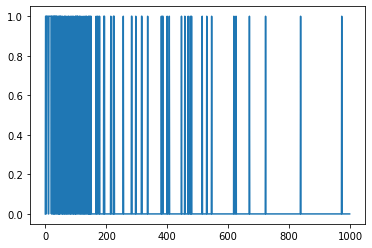

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                16016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5691 - accuracy: 0.7186 - binary_crossentropy: 0.5691 - val_loss: 0.4228 - val_accuracy: 0.8230 - val_binary_crossentropy: 0.4228 - 2s/epoch - 39ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3659 - accuracy: 0.8467 - binary_crossentropy: 0.3659 - val_loss: 0.3454 - val_accuracy: 0.8539 - val_binary_crossentropy: 0.3454 - 445ms/epoch - 9ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3218 - accuracy: 0.8658 - binary_crossentropy: 0.3218 - val_loss: 0.3315 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3315 - 454ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3100 - accuracy: 0.8724 - binary_crossentropy: 0.3100 - val_loss: 0.3295 - val_accuracy: 0.8595 - val_binary_crossentropy: 0.3295 - 442ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3023 - accuracy: 0.8760 - binary_crossentropy: 0.3023 - val_loss: 0.3285 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3285 - 439ms/epoch - 9ms/step
Epoch 6/20
49/49 - 1s - loss: 0.2984 - accuracy: 0.8772 - binary_cr

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 4004      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.6442 - accuracy: 0.6596 - binary_crossentropy: 0.6442 - val_loss: 0.5677 - val_accuracy: 0.7787 - val_binary_crossentropy: 0.5677 - 3s/epoch - 61ms/step
Epoch 2/20
49/49 - 1s - loss: 0.5011 - accuracy: 0.8148 - binary_crossentropy: 0.5011 - val_loss: 0.4543 - val_accuracy: 0.8270 - val_binary_crossentropy: 0.4543 - 763ms/epoch - 16ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4139 - accuracy: 0.8450 - binary_crossentropy: 0.4139 - val_loss: 0.3952 - val_accuracy: 0.8428 - val_binary_crossentropy: 0.3952 - 497ms/epoch - 10ms/step
Epoch 4/20
49/49 - 1s - loss: 0.3678 - accuracy: 0.8576 - binary_crossentropy: 0.3678 - val_loss: 0.3651 - val_accuracy: 0.8515 - val_binary_crossentropy: 0.3651 - 534ms/epoch - 11ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3419 - accuracy: 0.8640 - binary_crossentropy: 0.3419 - val_loss: 0.3495 - val_accuracy: 0.8549 - val_binary_crossentropy: 0.3495 - 394ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3265 - accuracy: 0.8679 - binary

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               512512    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 4s - loss: 0.4317 - accuracy: 0.7982 - binary_crossentropy: 0.4317 - val_loss: 0.3428 - val_accuracy: 0.8517 - val_binary_crossentropy: 0.3428 - 4s/epoch - 75ms/step
Epoch 2/20
49/49 - 3s - loss: 0.2914 - accuracy: 0.8799 - binary_crossentropy: 0.2914 - val_loss: 0.3274 - val_accuracy: 0.8571 - val_binary_crossentropy: 0.3274 - 3s/epoch - 59ms/step
Epoch 3/20
49/49 - 3s - loss: 0.2320 - accuracy: 0.9083 - binary_crossentropy: 0.2320 - val_loss: 0.3364 - val_accuracy: 0.8542 - val_binary_crossentropy: 0.3364 - 3s/epoch - 71ms/step
Epoch 4/20
49/49 - 3s - loss: 0.1149 - accuracy: 0.9646 - binary_crossentropy: 0.1149 - val_loss: 0.4322 - val_accuracy: 0.8457 - val_binary_crossentropy: 0.4322 - 3s/epoch - 59ms/step
Epoch 5/20
49/49 - 3s - loss: 0.0284 - accuracy: 0.9949 - binary_crossentropy: 0.0284 - val_loss: 0.5331 - val_accuracy: 0.8480 - val_binary_crossentropy: 0.5331 - 3s/epoch - 59ms/step
Epoch 6/20
49/49 - 3s - loss: 0.0054 - accuracy: 0.9997 - binary_crossentro

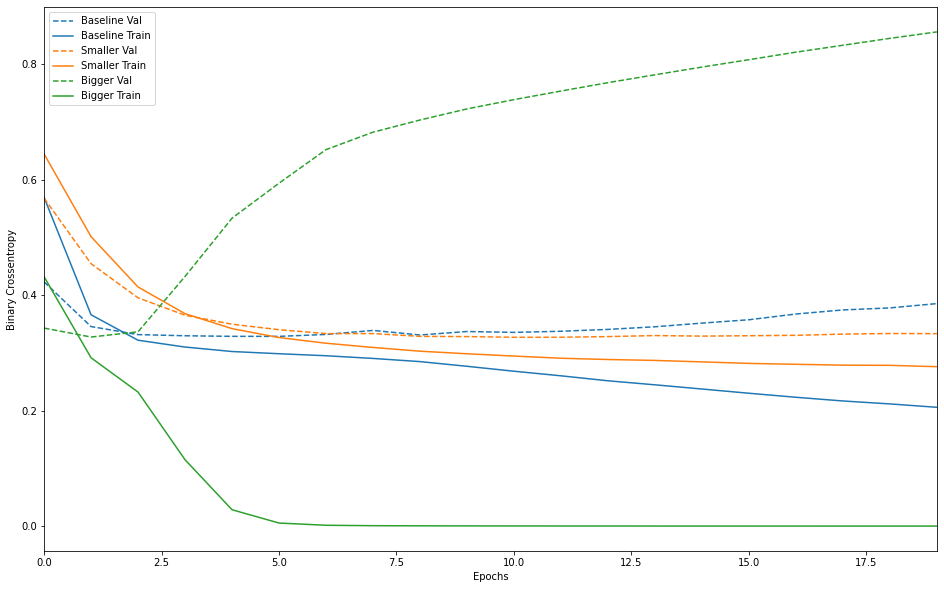

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5974 - accuracy: 0.7271 - binary_crossentropy: 0.5532 - val_loss: 0.4563 - val_accuracy: 0.8298 - val_binary_crossentropy: 0.4130 - 1s/epoch - 26ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4045 - accuracy: 0.8518 - binary_crossentropy: 0.3614 - val_loss: 0.3894 - val_accuracy: 0.8534 - val_binary_crossentropy: 0.3467 - 470ms/epoch - 10ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3661 - accuracy: 0.8657 - binary_crossentropy: 0.3241 - val_loss: 0.3762 - val_accuracy: 0.8574 - val_binary_crossentropy: 0.3352 - 454ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3534 - accuracy: 0.8697 - binary_crossentropy: 0.3133 - val_loss: 0.3672 - val_accuracy: 0.8623 - val_binary_crossentropy: 0.3280 - 458ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3450 - accuracy: 0.8738 - binary_crossentropy: 0.3065 - val_loss: 0.3674 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3299 - 451ms/epoch - 9ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3409 - accuracy: 0.8740 - binary_c

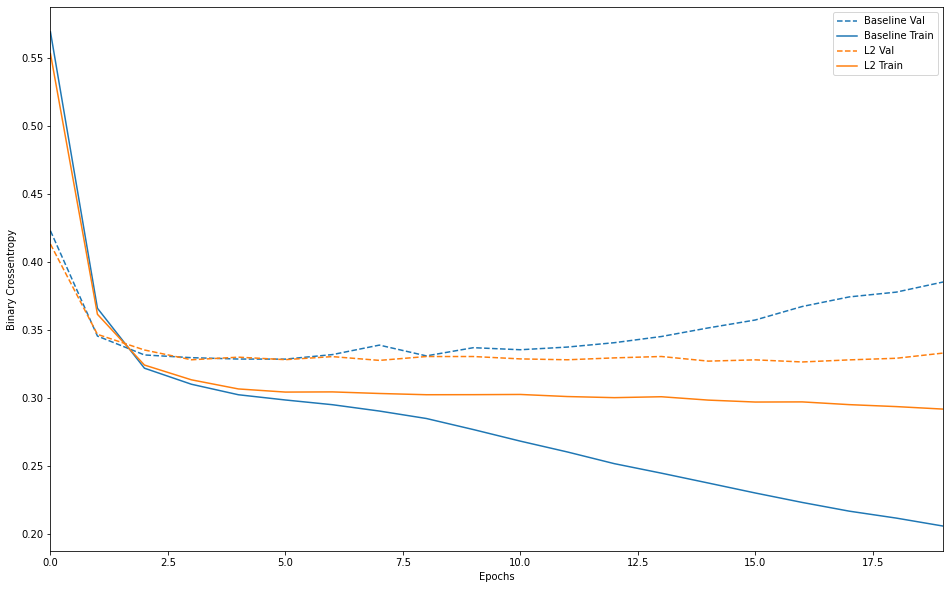

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6737 - accuracy: 0.5692 - binary_crossentropy: 0.6737 - val_loss: 0.6146 - val_accuracy: 0.7479 - val_binary_crossentropy: 0.6146 - 1s/epoch - 26ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6025 - accuracy: 0.6777 - binary_crossentropy: 0.6025 - val_loss: 0.5101 - val_accuracy: 0.8120 - val_binary_crossentropy: 0.5101 - 461ms/epoch - 9ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5255 - accuracy: 0.7585 - binary_crossentropy: 0.5255 - val_loss: 0.4226 - val_accuracy: 0.8395 - val_binary_crossentropy: 0.4226 - 451ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4593 - accuracy: 0.8062 - binary_crossentropy: 0.4593 - val_loss: 0.3724 - val_accuracy: 0.8476 - val_binary_crossentropy: 0.3724 - 474ms/epoch - 10ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4199 - accuracy: 0.8273 - binary_crossentropy: 0.4199 - val_loss: 0.3435 - val_accuracy: 0.8563 - val_binary_crossentropy: 0.3435 - 467ms/epoch - 10ms/step
Epoch 6/20
49/49 - 1s - loss: 0.3909 - accuracy: 0.8423 - binary_

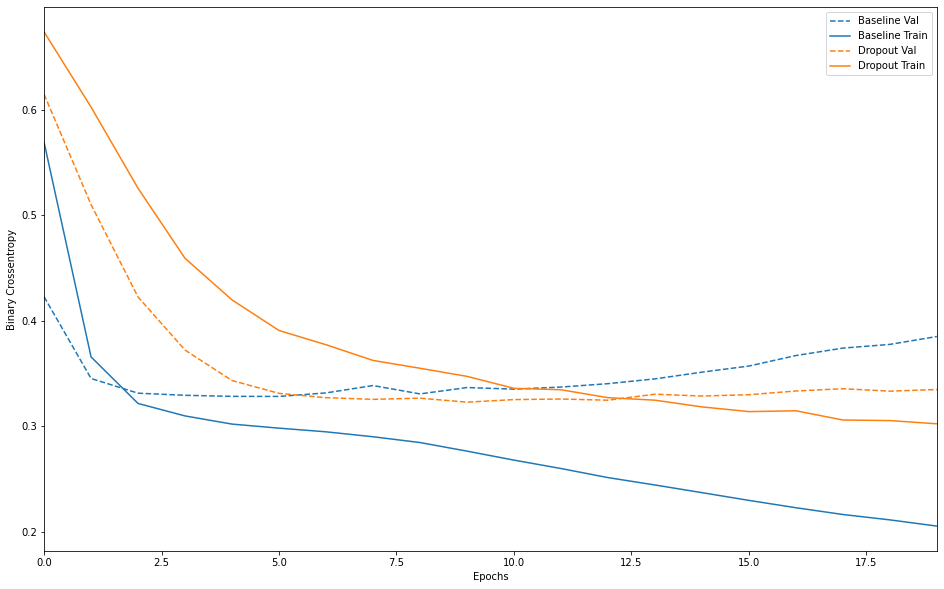

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

## 실습 02) <a herf=https://www.tensorflow.org/tutorials/images/data_augmentation>꽃 이미지 분류를 위한 이미지 데이터 증강</a>
(자세한 설명은 위 링크 참조)

In [15]:
!pip install -q tf-nightly

     |████████████████████████████████| 492.9 MB 14 kB/s 
     |████████████████████████████████| 1.4 MB 46.7 MB/s 
     |████████████████████████████████| 462 kB 64.0 MB/s 
     |████████████████████████████████| 5.8 MB 51.3 MB/s 
     |████████████████████████████████| 2.1 MB 49.5 MB/s 


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [17]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [18]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


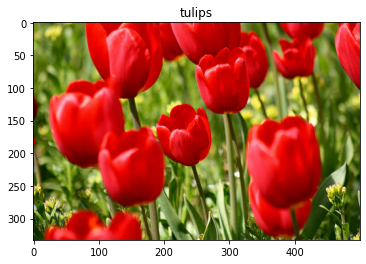

In [19]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [20]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

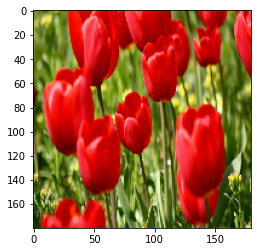

In [21]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [22]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


In [23]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [24]:
# Add the image to a batch
image = tf.expand_dims(image, 0)

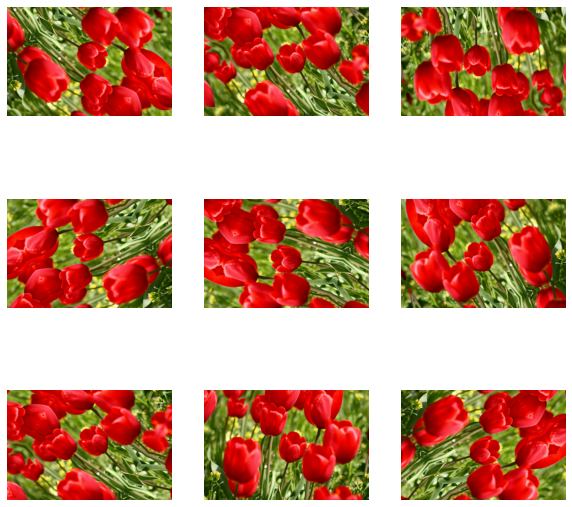

In [25]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

옵션 1: 전처리 레이어를 모델의 일부로 만들기

In [26]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model
])

옵션 2: 데이터세트에 전처리 레이어 적용하기

In [28]:
# 여기선 옵션 2사용
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

In [29]:
batch_size = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefecting on all datasets
  return ds.prefetch(buffer_size=AUTOTUNE)

In [30]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [31]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 129s 1s/step - loss: 1.3176 - accuracy: 0.4230 - val_loss: 1.2364 - val_accuracy: 0.4905
Epoch 2/5
92/92 [==============================] - 148s 2s/step - loss: 1.1131 - accuracy: 0.5330 - val_loss: 1.1046 - val_accuracy: 0.5259
Epoch 3/5
92/92 [==============================] - 105s 1s/step - loss: 1.0366 - accuracy: 0.5841 - val_loss: 1.0107 - val_accuracy: 0.6104
Epoch 4/5
92/92 [==============================] - 98s 1s/step - loss: 0.9522 - accuracy: 0.6178 - val_loss: 0.9960 - val_accuracy: 0.6349
Epoch 5/5
68/92 [=====================>........] - ETA: 24s - loss: 0.9044 - accuracy: 0.6530

In [34]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 7s 517ms/step - loss: 0.9380 - accuracy: 0.6376
Accuracy 0.6376021504402161


사용자 정의 데이터 증강

사용자 정의 데이터 증강 레이어를 만들 수도 있습니다. 이 튜토리얼에서는 두 가지 방법을 소개합니다. 먼저, layers.Lambda 레이어를 생성합니다. 이것은 간결한 코드를 작성하는 좋은 방법입니다. 다음으로, 제어력을 높여주는 서브 클래스 생성을 통해 새 레이어를 작성합니다. 두 레이어는 확률에 따라 이미지의 색상을 무작위로 반전합니다.

In [35]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [36]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

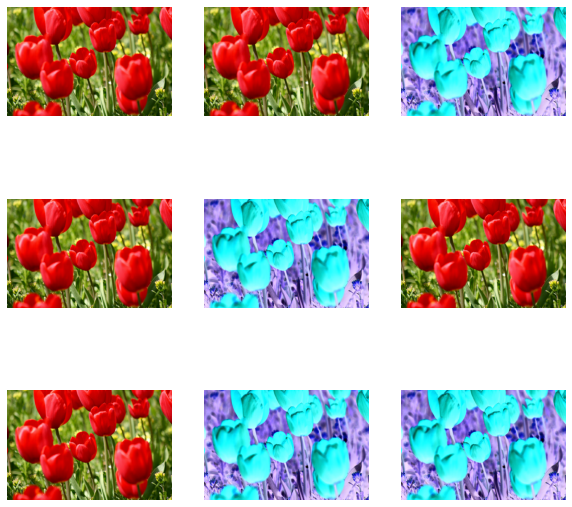

In [37]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

다음으로, 서브 클래스 생성을 통해 사용자 정의 레이어를 구현합니다.

In [38]:
class RandomInvert(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)

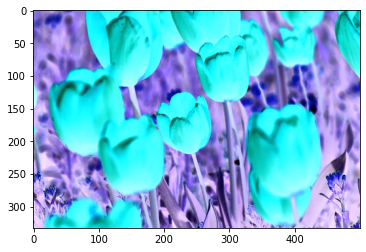

In [39]:
_ = plt.imshow(RandomInvert()(image)[0])

tf.image 사용하기

위의 layers.preprocessing 유틸리티는 편리합니다. 보다 세밀한 제어를 위해서는 tf.data 및 tf.image를 사용하여 고유한 데이터 증강 파이프라인 또는 레이어를 작성할 수 있습니다. 

꽃 데이터세트는 이전에 데이터 증강으로 구성되었으므로 다시 가져와서 새로 시작하겠습니다.

In [40]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

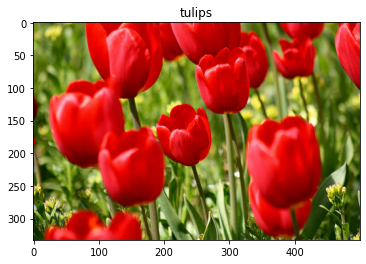

In [41]:
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [42]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

이미지 뒤집기

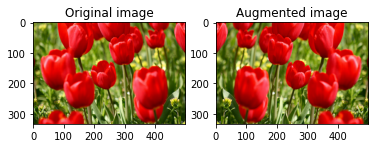

In [43]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

이미지를 회색조로 만들기

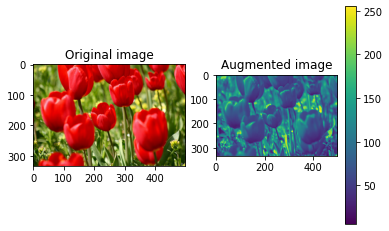

In [44]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

이미지 포화시키기

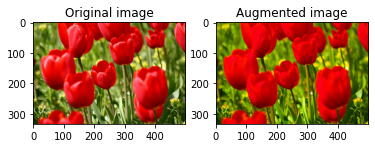

In [45]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

이미지 밝기 변경

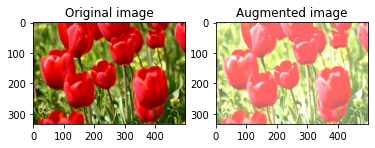

In [46]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

이미지 중앙 자르기

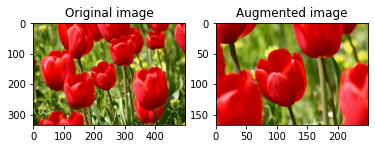

In [47]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image,cropped)

이미지 회전하기

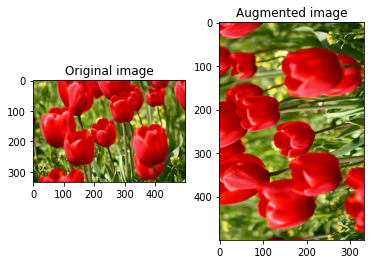

In [48]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

데이터 세트에 증강 적용하기

In [49]:
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

In [50]:
def augment(image,label):
  image, label = resize_and_rescale(image, label)
  # Add 6 pixels of padding
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6) 
   # Random crop back to the original size
  image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])
  image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
  image = tf.clip_by_value(image, 0, 1)
  return image, label

데이터 세트 구성하기

In [51]:
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [52]:
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [53]:
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

이제 이러한 데이터세트를 사용하여 이전에 표시한 대로 모델을 훈련할 수 있습니다.

## Reference

1. Do it! 딥러닝 교과서
2. https://www.tensorflow.org/tutorials/

---

*made by* <font color='6699ff'>Kim Geon</font>(DCU, major.AI·BD)

---